In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:10<00:00, 171MB/s]
100% 1.06G/1.06G [00:10<00:00, 104MB/s]


In [4]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Transfer learning

 Feature extraction

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# Existing model- VGG16
from keras.applications import VGG16

In [6]:
conv_base= VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

58889256/58889256 [==============================] - 0s 0us/step


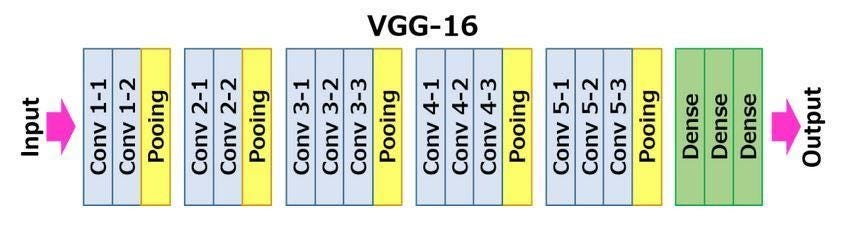

In [8]:
conv_base.trainable= False
set_trainable= False
for layer in conv_base.layers:
    layer.trainable= False
for layer in conv_base.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [9]:
model= Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [10]:
# Preprocessing- Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, array_to_img, load_img

In [11]:
batch_size= 32

train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range= 0., horizontal_flip= True)
test_datagen= ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory('/content/train', target_size= (224,224),
                                                   batch_size=batch_size, class_mode='binary')

validation_generator= test_datagen.flow_from_directory('/content/test', target_size= (224,224),
                                                   batch_size=batch_size, class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit_generator(train_generator, validation_data=validation_generator, epochs=5)

<ipython-input-14-0cf6f625192f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(train_generator, validation_data=validation_generator, epochs=5)


Epoch 1/5
190/625 [========>.....................] - ETA: 2:22:06 - loss: 0.4339 - accuracy: 0.8582